<a href="https://colab.research.google.com/github/danilpchelintsev/Data-Analysis/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1

In [ ]:
# 1
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import numpy as np

hr = pd.read_csv("HR.csv")
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


#2

In [ ]:
hr.info()
# нет пропущенных данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [ ]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [ ]:
hr.var()

<ipython-input-4-f1e26c17d769>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr.var()


satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64

In [ ]:
hr.var(ddof = 1)
# исправленная (несмещенная) дисперсия

<ipython-input-5-aa3ba5f02073>:1: FutureWarning: The default value of numeric_only in DataFrame.var is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  hr.var(ddof = 1)


satisfaction_level          0.061817
last_evaluation             0.029299
number_project              1.519284
average_montly_hours     2494.313175
time_spend_company          2.131998
Work_accident               0.123706
left                        0.181411
promotion_last_5years       0.020817
dtype: float64

In [ ]:
hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


#3

In [ ]:
# 3
hr_quan = hr.loc[:, ~hr.columns.isin(['department', 'salary'])]
hr_quan.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
0,0.38,0.53,2,157,3,0,1,0
1,0.80,0.86,5,262,6,0,1,0
2,0.11,0.88,7,272,4,0,1,0
3,0.72,0.87,5,223,5,0,1,0
4,0.37,0.52,2,159,3,0,1,0


<Axes: >

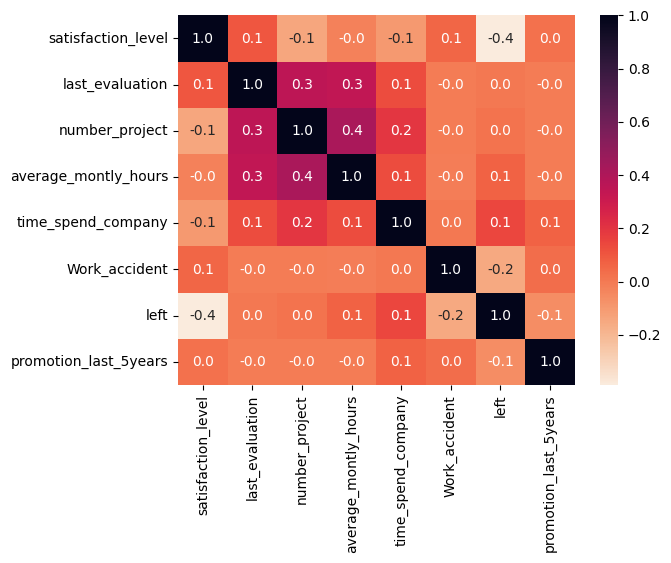

In [ ]:
sns.heatmap(hr_quan.corr(), annot = True, fmt=".1f", cmap="rocket_r")

In [ ]:
# видим, что самые скоррелированные переменные, при корреляции 0.4 и 0.3 это:
# average_montly_hours - number_project
# last_evaluation - number_project

In [ ]:
# наим. корреляция:
# left - satisfaction_level
# left - Work_accident

#4

In [ ]:
# 4
hr.groupby('department')['department'].count()

department
IT             1227
RandD           787
accounting      767
hr              739
management      630
marketing       858
product_mng     902
sales          4140
support        2229
technical      2720
Name: department, dtype: int64

#5

In [ ]:
# 5
salary = hr.groupby('salary')['salary'].count()
salary

salary
high      1237
low       7316
medium    6446
Name: salary, dtype: int64

<Axes: xlabel='salary', ylabel='salary'>

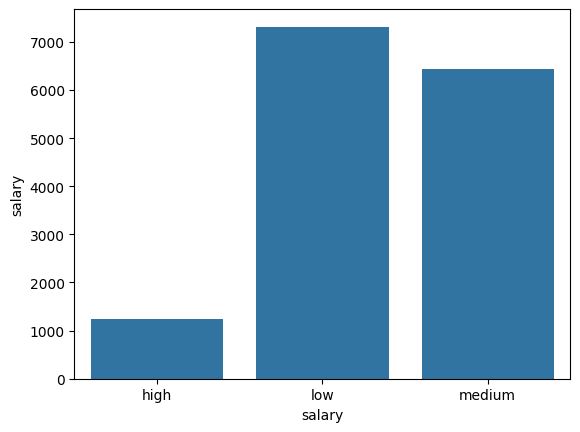

In [ ]:
sns.barplot(salary)

#6

In [ ]:
# 6

salary_depart = hr.groupby(['department','salary']).apply(lambda x : x.salary.count()).reset_index()
salary_depart

,department,salary,0
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


In [ ]:
salary_depart.columns= ["department", "salary", "count"]
salary_depart

,department,salary,count
0,IT,high,83
1,IT,low,609
2,IT,medium,535
3,RandD,high,51
4,RandD,low,364
5,RandD,medium,372
6,accounting,high,74
7,accounting,low,358
8,accounting,medium,335
9,hr,high,45


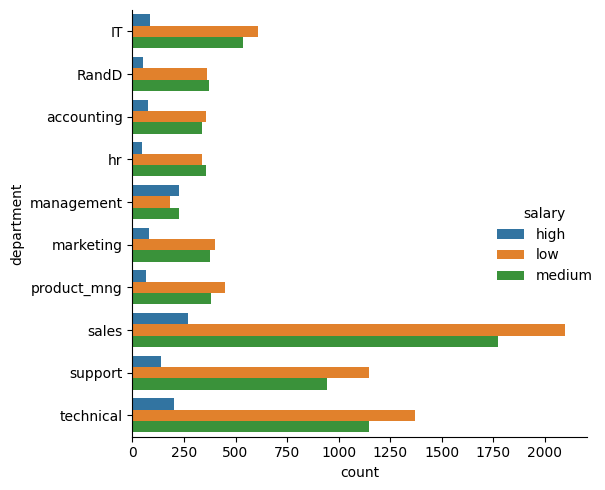

In [ ]:
sns.catplot(salary_depart, x = "count", y = "department", kind = "bar", hue = "salary")
plt.tight_layout()
plt.show()

#7

In [ ]:
# 7
hr_high = hr[hr['salary'] == "high"]['average_montly_hours']
hr_high.head()

72     149
111    289
189    156
267    129
306    149
Name: average_montly_hours, dtype: int64

In [ ]:
hr_low = hr[hr['salary'] == "low"]['average_montly_hours']
hr_low.head()

0    157
3    223
4    159
5    153
6    247
Name: average_montly_hours, dtype: int64

In [ ]:
# проверим нормальность
stats.shapiro(hr_high)

ShapiroResult(statistic=0.9712138175964355, pvalue=5.604931784946058e-15)

In [ ]:
stats.shapiro(hr_low)

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.9598619937896729, pvalue=7.01181725578852e-41)

<Axes: >

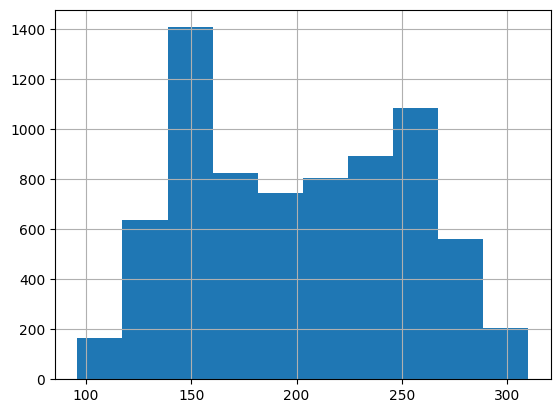

In [ ]:
hr_low.hist()

<Axes: >

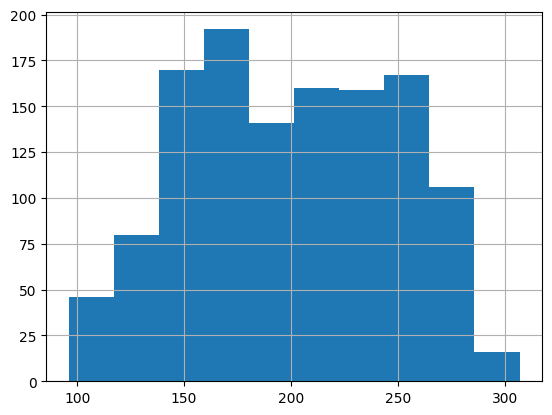

In [ ]:
hr_high.hist()

In [ ]:
t, p = stats.ttest_ind(hr_high, hr_low)
p
# делаем вывод, что гипотеза неверна

0.4661023478267259

#8

In [ ]:
# 8
hr_out = hr[hr['left'] == 1]
hr_out.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [ ]:
hr_in = hr[hr['left'] != 1]
hr_in.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low


In [ ]:
# для ушедших
proc = len(hr_out[hr_out['promotion_last_5years'] == 1]) / len(hr_out) * 100
print(f'{proc} %')

0.5320638476617194 %


In [ ]:
hr_out['satisfaction_level'].mean()

0.4400980117614114

In [ ]:
hr_out['number_project'].mean()

3.8555026603192384

In [ ]:
# но логичнее указать челое число:
round(hr_out['number_project'].mean())

4

In [ ]:
# для тех, кто остался
proc = len(hr_in[hr_in['promotion_last_5years'] == 1]) / len(hr_in) * 100
print(f'{proc} %')

2.6251312565628284 %


In [ ]:
hr_in['satisfaction_level'].mean()

0.666809590479524

In [ ]:
round(hr_in['number_project'].mean())

4

#9

In [ ]:
# 9 LDA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

data = hr.drop(['department', 'salary'], axis=1)

In [ ]:
X = data.drop('left', axis=1)
y = data['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [ ]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.7533333333333333


In [ ]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result.head(10)

,left,Unnamed 0
6723,0.0,NaN
6473,0.0,NaN
4679,0.0,NaN
862,1.0,1.0
7286,0.0,NaN
8127,0.0,NaN
3017,0.0,NaN
3087,0.0,NaN
6425,0.0,NaN
2250,0.0,0.0
